In [1]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance

In [29]:
# Loading the data
file_path = "Rice_Cammeo_Osmancik.xlsx" #change the file path

df = pd.read_excel(file_path)

df.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
5,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897,Cammeo
6,15757,509.281006,207.296677,98.336136,0.880323,16150,0.589708,Cammeo
7,16405,526.570007,221.612518,95.436707,0.902521,16837,0.658888,Cammeo
8,14534,483.640991,196.650818,95.050682,0.875429,14932,0.649651,Cammeo
9,13485,471.570007,198.272644,87.727287,0.896789,13734,0.572320,Cammeo


In [31]:
# Basic Data Exploration
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

for col in df.columns:
    print("Feature:", col)
    print("Min:", df[col].min())
    print("Max:", df[col].max())
    print('==========================')

Number of rows: 3810
Number of columns: 8
Feature: Area
Min: 7551
Max: 18913
Feature: Perimeter
Min: 359.1000061035156
Max: 548.4459838867188
Feature: Major_Axis_Length
Min: 145.26446533203125
Max: 239.010498046875
Feature: Minor_Axis_Length
Min: 59.532405853271484
Max: 107.54244995117188
Feature: Eccentricity
Min: 0.7772325873374939
Max: 0.9480069279670715
Feature: Convex_Area
Min: 7723
Max: 19099
Feature: Extent
Min: 0.49741286039352417
Max: 0.8610495328903198
Feature: Class
Min: Cammeo
Max: Osmancik


In [3]:
# Dropping the 'Class' column for normalization
df2 = df.drop(columns=['Class'])

In [4]:
# Displaying Mean and Standard Deviation
for col in df2.columns:
    print("Feature:", col)
    print("Mean:", df2[col].mean())
    print("Std:", df2[col].std())
    print('==========================')

Feature: Area
Mean: 12667.727559055118
Std: 1732.3677060741602
Feature: Perimeter
Mean: 454.2391801488681
Std: 35.59708144273353
Feature: Major_Axis_Length
Mean: 188.77622197669322
Std: 17.44867850174685
Feature: Minor_Axis_Length
Mean: 86.31375037165765
Std: 5.72981733364374
Feature: Eccentricity
Mean: 0.886870506742182
Std: 0.02081763410047774
Feature: Convex_Area
Mean: 12952.496850393702
Std: 1776.9720420835554
Feature: Extent
Mean: 0.6619340379094202
Std: 0.07723877328752675


In [5]:
# Scaling the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df2)
df_norm = pd.DataFrame(normalized_data, columns=df2.columns.values)

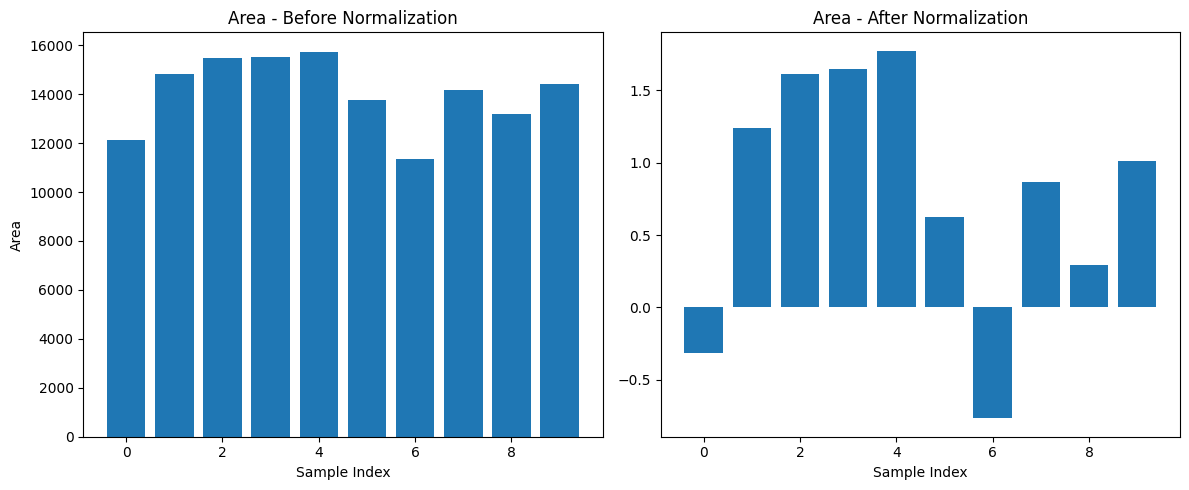

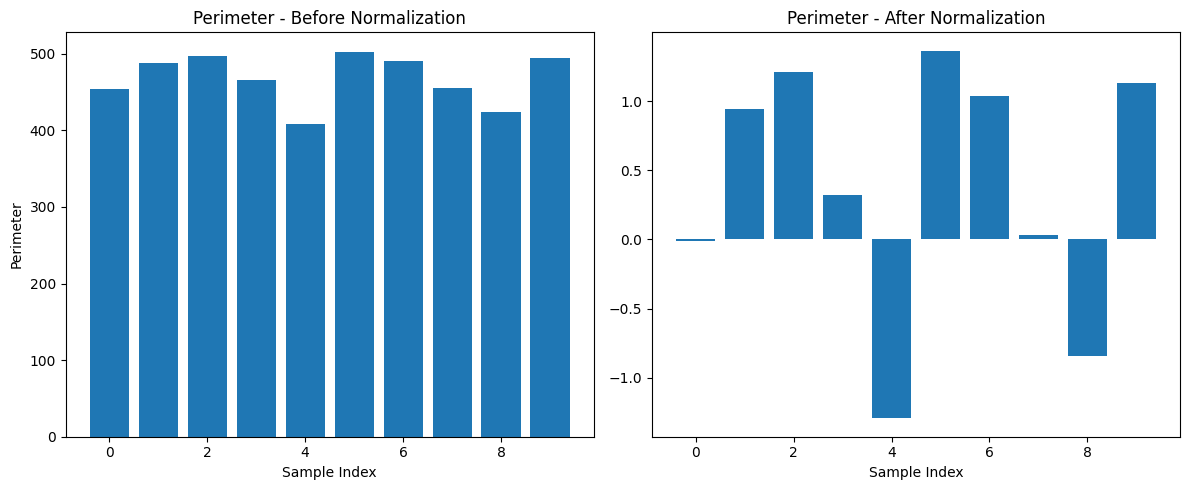

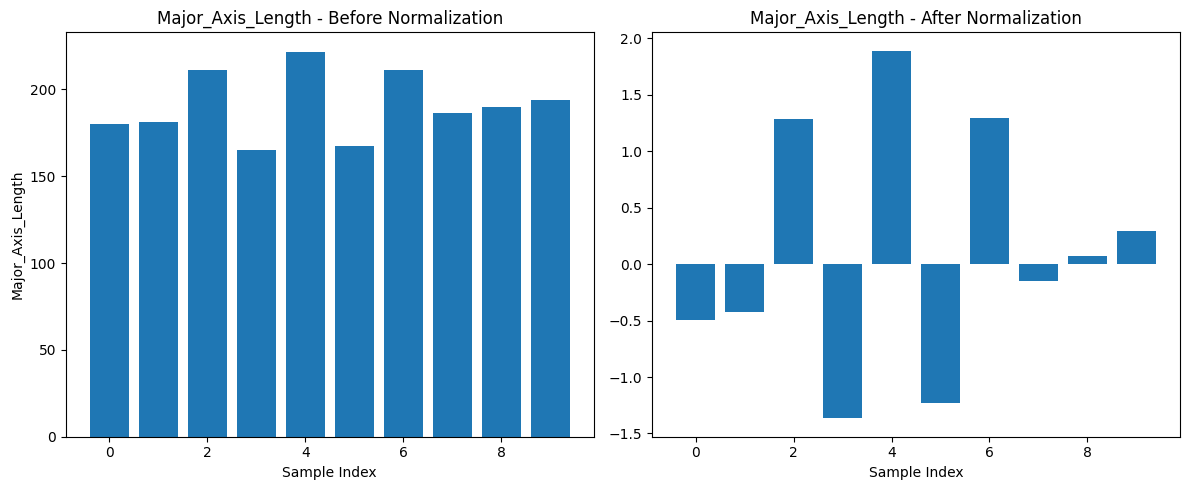

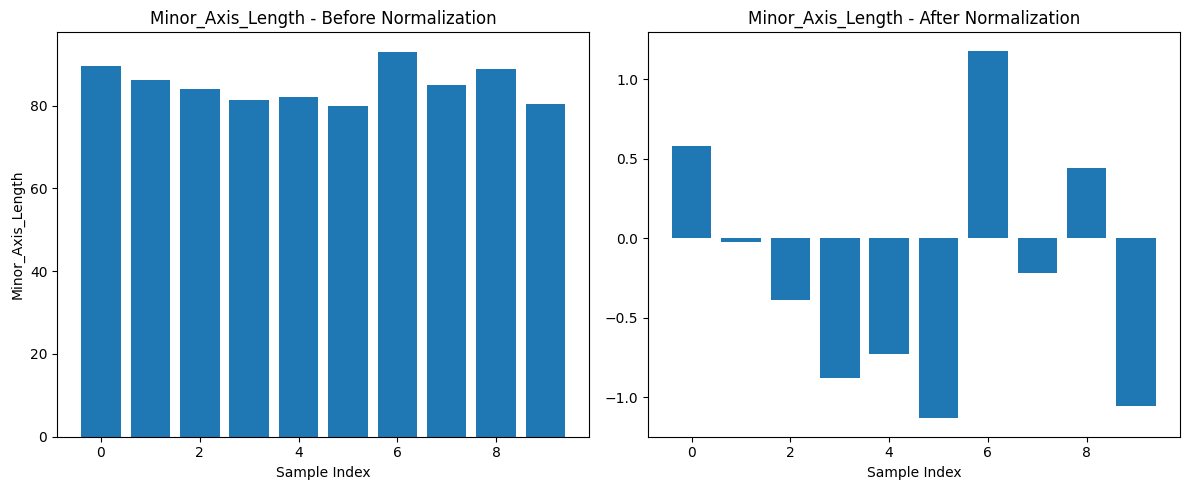

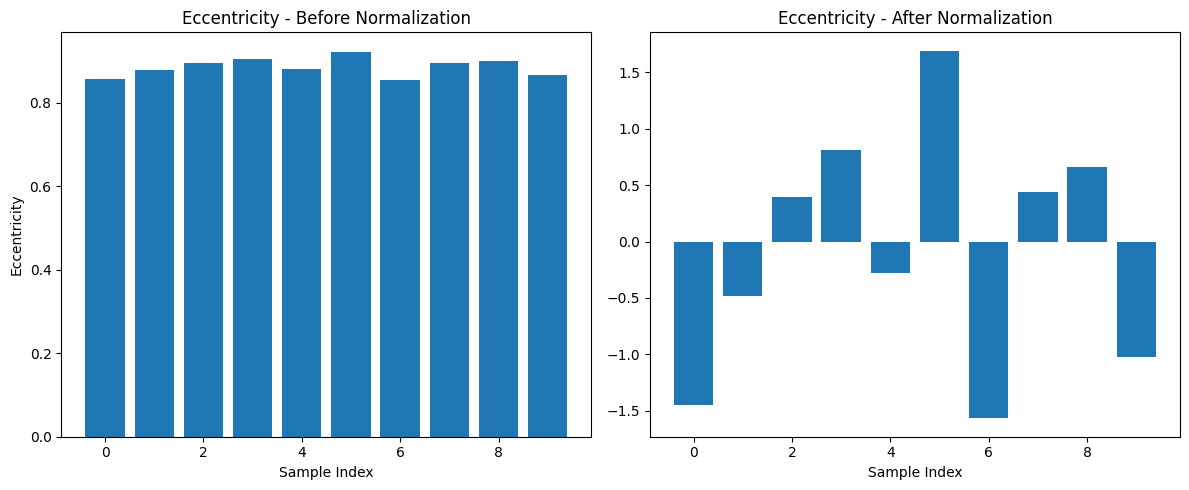

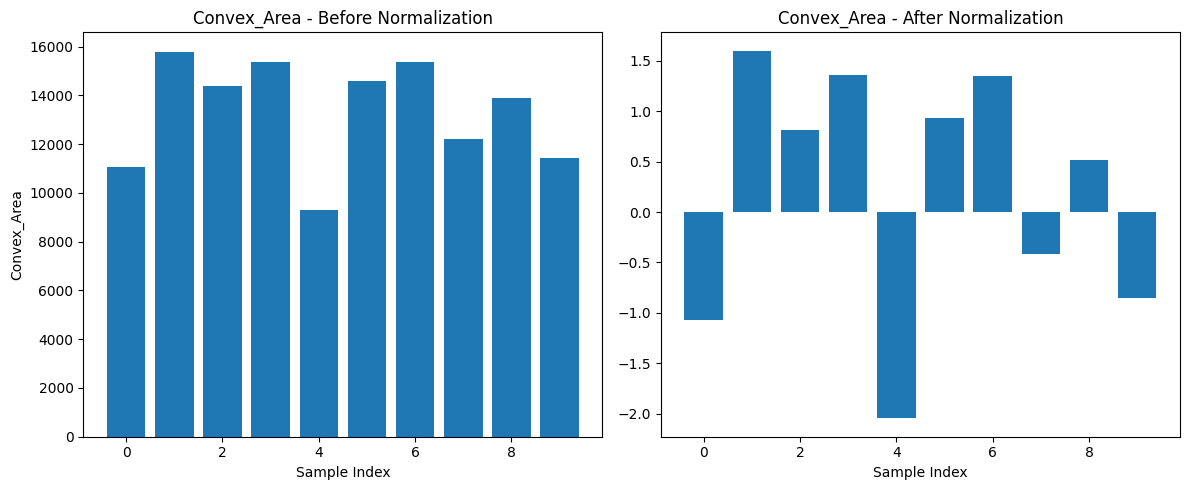

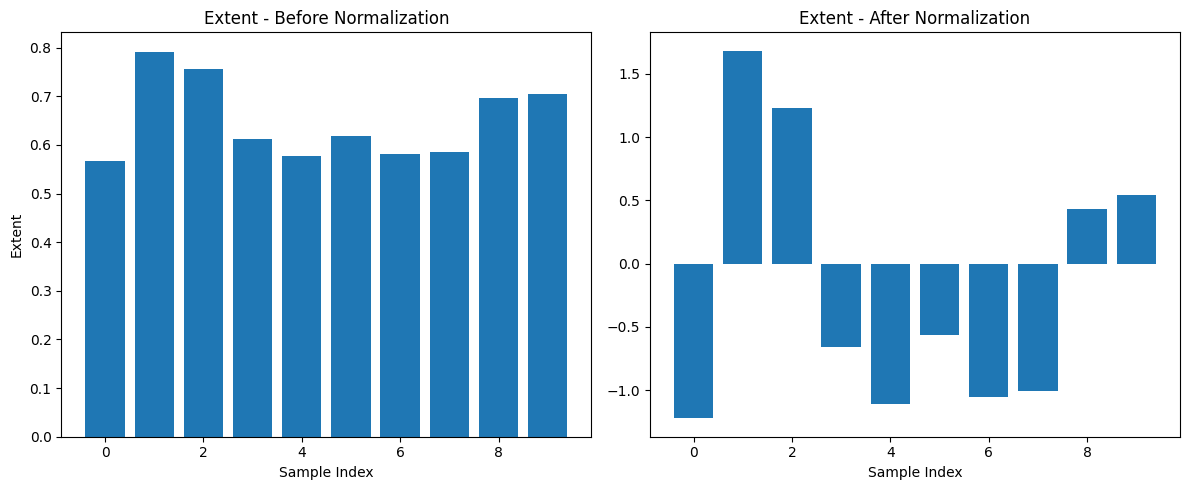

In [6]:
# Selecting random samples and plotting
num_samples = 10
for col in df2.columns:
    random_indices = np.random.choice(df.shape[0], num_samples, replace=False)

    # Data before normalization
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.bar(range(num_samples), df2[col].iloc[random_indices])
    plt.title(f'{col} - Before Normalization')
    plt.xlabel('Sample Index')
    plt.ylabel(col)

    # Data after normalization
    plt.subplot(1, 2, 2)
    plt.bar(range(num_samples), df_norm[col].iloc[random_indices])
    plt.title(f'{col} - After Normalization')
    plt.xlabel('Sample Index')

    plt.tight_layout()
    plt.show()